# Importing rasterio library

In [1]:
import rasterio

# Reading the dataset

In [6]:
ds= rasterio.open("/Users/eliekhveh/Desktop/py_scripts/raster/nepal_lc_2020.tif")
data= ds.read()
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

# Reading Data Metadat

In [7]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [8]:
ds.name

'/Users/eliekhveh/Desktop/py_scripts/raster/nepal_lc_2020.tif'

In [9]:
ds.shape

(1485, 2932)

In [12]:
print(data.min())
print(data.max())

10
255


# Visualization

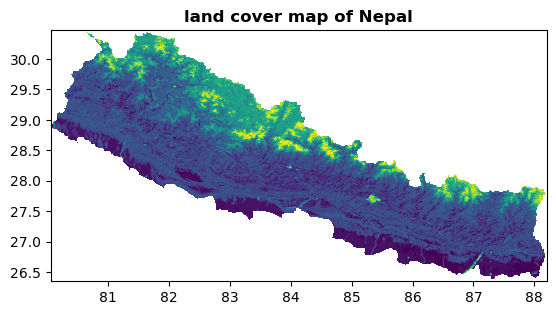

<Axes: title={'center': 'land cover map of Nepal'}>

In [15]:
from rasterio.plot import show
show(ds, title='land cover map of Nepal')

# Writing raster data


In [16]:
with rasterio.open(r"/Users/eliekhveh/Desktop/py_scripts/raster/output.tiff", 'w', 
                   driver=ds.driver, 
                   height=ds.height, 
                   width=ds.width,
                    count=ds.count,
                    crs=ds.crs,
                    transform=ds.transform,
                    dtype=data.dtype)as dst:
    dst.write(data)